# Исследование объявлений о продаже квартир

**Цель исследования:** научиться определять рыночную стоимость объектов недвижимости, учитывая существующие на рынке  особенности и зависимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Исходные данные:** архив объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Содержание:
* [1. Общая информация о данных](#1-Общая-информация-о-данных)
* [2. Предобработка данных](#2-Предобработка-данных)
* [3. Добавление в таблицу новых столбцов](#3-Добавление-в-таблицу-новых-столбцов)
* [4. Исследовательский анализ данных](#4-Исследовательский-анализ-данных)
* [5. Общий вывод](#Общий-вывод)

## 1 Общая информация о данных

In [103]:
# импорт библиотек и датасета
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
try:
    data_first = pd.read_csv('real_estate_data.csv', sep = '\t')
except:
    data_first = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
        
data_first.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [105]:
data_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

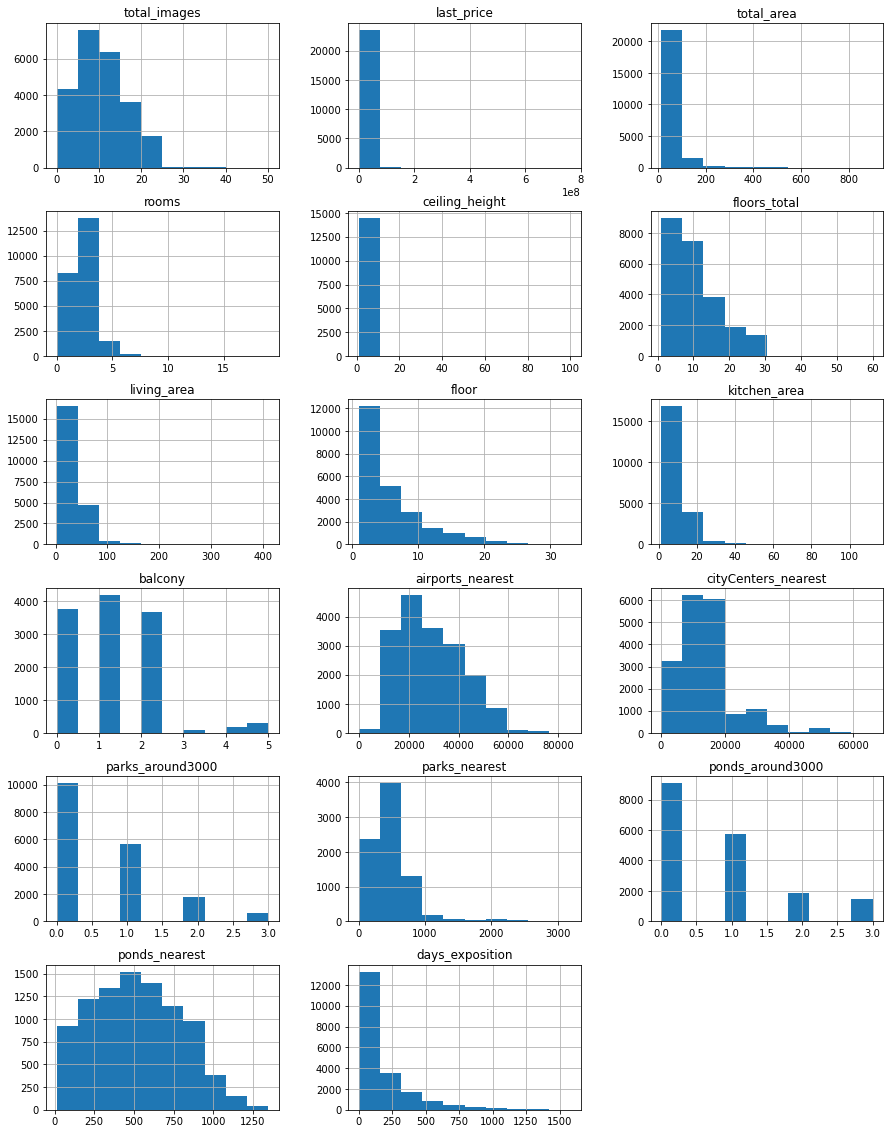

In [106]:
data_first.hist(figsize = (15, 20), layout = (6, 3)); #графики по каждому столбцу

На гистограммах `last_price`, `total_area`, `rooms`, `living_area`, `kitchen_area` и `ceiling_height` практически все значения сосредоточены в начале координат и ненаглядны. Распределение не похоже ни на нормальное, ни на Пуассона. Значит, в данных присутствуют аномально большие значения. Может быть это выбросы, а может быть это просто данные об очень больших квартирах.

**Вывод:** данные содержат в себе 23699 строк, 22 столбца. Такого объема достаточно для анализа, но во многих столбцах имеются пропуски, некоторые из них (например, `is_apartment` или `parks_nearest`) заполнены меньше, чем наполовину. Также есть неправдоподобные выбросы, например в данных о высоте потолков `ceiling_height`. 

## 2 Предобработка данных

### 2.1 Заполнение пропусков
     

In [107]:
data = data_first

# удалим все данные, где не указан населенный пункт - их совсем немного
data = data.dropna(subset = ['locality_name'])
# а также данные, где не указана общая этажность
data = data.dropna(subset = ['floors_total'])

# обработка пропусков в is_apartment
# на месте пропусков - булево значение False - данное помещение просто не является апартаментами
data['is_apartment'] = data['is_apartment'].fillna(False) 

# обработка пропусков в balcony
# на месте пропусков - 0, балконов нет
data['balcony'] = data['balcony'].fillna(0) 

# parks_around3000 и ponds_around3000
# на месте пропусков - 0, парков и водоемов в пределах заданной территории нет
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# определим, связано ли отсутствие данных о парках и водоемах в пределах 3 км
# со столбцами parks_nearest и ponds_nearest
print('Водоемы с пропусками:', data.query('(ponds_around3000 == 0) and (ponds_nearest.isna())').shape[0])
print('Парки с пропусками:', data.query('(parks_around3000 == 0) and (parks_nearest.isna())').shape[0])

Водоемы с пропусками: 14529
Парки с пропусками: 15535


Получается, столбцы `ponds_nearest` и `parks_nearest` учитывают не глобальную географию водоемов и парков, а только те, которые расположены в пределах 3 км - именно поэтому в столбцах пропуски.

Заполним пропуски в столбцах `living_area` и `kitchen_area`. Для этого нужно найти медианное значение отношения этих параметров к общей площади квартиры, а замем умножить столбец `total_area` на полученные значения.

In [108]:
area_data = data.pivot_table(index = data.index, values = ('total_area', 'living_area', 'kitchen_area'))
area_data['living_to_total'] = area_data['living_area']/area_data['total_area']
area_data['kitchen_to_total'] = area_data['kitchen_area']/area_data['total_area']

data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * area_data['living_to_total'].median()
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'total_area'] * area_data['kitchen_to_total'].median()
data['living_area'] = data['living_area'].round(2)
data['kitchen_area'] = data['kitchen_area'].round(2)

In [109]:
data.shape[0] / data_first.shape[0]

0.994345752985358

**Вывод:** 

Обработаны пропуски в следующих столбцах:

- `floors_total`
- `living_area`  
- `is_apartment` - там, где пропуск, значение False - это не апартаменты 
- `kitchen_area`
- `balcony` - там, где пропуск, значение 0 - балконов нет
- `locality_name`
- `parks_around3000`- там, где пропуск, значение 0 - парков в данном диапазоне нет            
- `ponds_around3000`- там, где пропуск, значение 0 - водоемов в данном диапазоне нет            
- `days_exposition`- там, где пропуск, значение 0 - объект сдается в аренду первый раз

В столбцах `parks_nearest` и `ponds_nearest` пропуски сохранены, они должны быть там согласно логике таблицы. Пропуски в стобцах `airports_nearest` и `cityCenters_nearest` могли возникнуть в результате ошибки при выгрузке/обработки данных, ведь эта информация должна заполняться автоматически. В `ceiling_height` пропуски оставлены.

### 2.2 Проверка дубликатов
Данные не содежрат явных дубликатов, однако в них много неявных дубликатов: так, например, у названия Мурино есть целых три варината: Мурино, поселок Мурино и посёлок Мурино. Приведем всё к одному виду - уберем из столбца все обозначения, оставив только сами названия.

In [110]:
data.duplicated().sum()

0

In [111]:
#data['locality_name'].value_counts().head(60)

In [112]:
names_to_replace = ['посёлок городского типа ', 'поселок городского типа ', 'городской посёлок ', 
                    'городской поселок ', 'коттеджный поселок ', 'коттеджный посёлок ','поселок ', 
                    'посёлок ', 'село ', 'деревня ', 'садоводческое некоммерческое товарищество ', 
                    'садоводческое товарищество ', 'садовое товарищество ', 'при железнодорожной станции ']

for name in names_to_replace:
    data['locality_name'] = data['locality_name'].str.replace(name, '')

# проверим уникальные значения в столбце    
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

**Вывод:** устранены неявные дубликаты в столбце `locality_name`. Все названия населенных пунктов приведены к единому виду.

### 2.3 Изменение типов данных 

In [113]:
data['floors_total'] = data['floors_total'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype('int')
#data['days_exposition'] = data['days_exposition'].astype('int')

#data.info()

**Вывод:** в столбцах `floors_total`, `balcony` и `days_exposition` данные переведены в целочисленный тип, а в `first_day_exposition` - в формат даты. Столбцу `is_apartment` автоматически присвоен булев тип.

### 2.4 Обработка аномальных значений
В столбцах `last_price`, `total_area`, `rooms`, `living_area`, `kitchen_area` и `ceiling_height` присутствуют аномально большие значения. Может быть это выбросы, а может быть это просто данные об очень больших квартирах. Также стоит сократить диапазон значений в `total_images` и `floors_total`. Проведем исследование значений в каждом столбце.

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


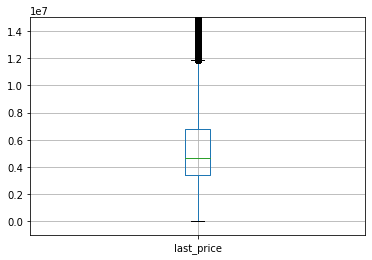

In [114]:
# обработка аномальных значений в last_price

print(data['last_price'].describe())
plt.ylim(-10**6, 1.5*10**7)
plt.xlim(0, 2)
data.boxplot(['last_price'])
#data['last_price'].hist(bins = 30, range = (0, 2*10**7))
plt.show()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


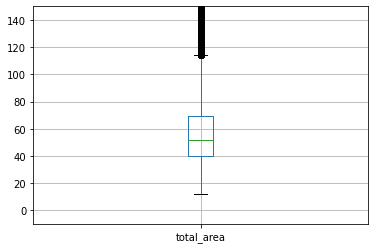

In [115]:
# обработка аномальных значений в total_area

print(data['total_area'].describe()) 
#data['total_area'].hist(bins = 30, range = (0,300))
data.boxplot(['total_area'])
plt.xlim(0,2)
plt.ylim(-10, 150)
plt.show()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


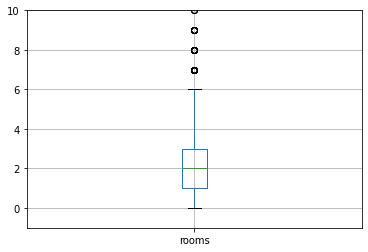

In [116]:
# обработка аномальных значений в rooms

print(data['rooms'].describe())
#data['rooms'].hist(bins = 30, range = (0, 8))
data.boxplot(['rooms'])
plt.xlim(0,2)
plt.ylim(-1, 10)
plt.show()

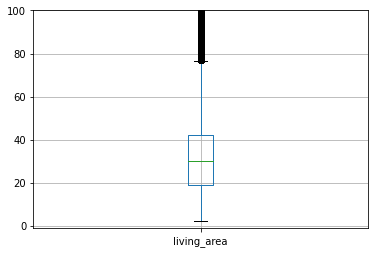

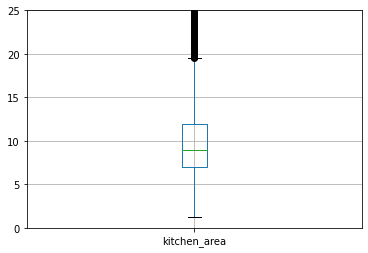

In [117]:
#обработка аномальных значений в living_area

#print(data['living_area'].describe())
#data['living_area'].hist(bins = 30, range = (0, 100))
data.boxplot(['living_area'])
plt.xlim(0,2)
plt.ylim(-1, 100)
plt.show()

#обработка аномальных значений в kitchen_area

#print(data['kitchen_area'].describe())
#data['kitchen_area'].hist(bins = 30, range = (0, 40))
data.boxplot(['kitchen_area'])
plt.xlim(0,2)
plt.ylim(0, 25)
plt.show()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


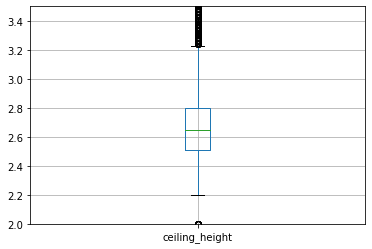

In [118]:
#обработка аномальных значений в ceiling_height

print(data['ceiling_height'].describe())
#data.sort_values(by = 'ceiling_height', ascending = False).head(40)
# выбросом является только одна стока 22869, остальные значения, которые находятся 
# в диапазоне от 25 нужно перевести в метры
# data = data.query('ceiling_height < 100')
data.loc[data['ceiling_height'] >= 22, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 22, 'ceiling_height']/10
#data.sort_values(by = 'ceiling_height', ascending = True).head(40)
data.boxplot(['ceiling_height'])
plt.xlim(0,2)
plt.ylim(2, 3.5);

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


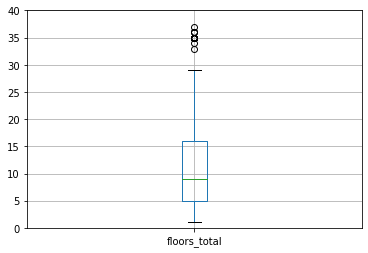

In [119]:
#обработка аномальных значений в floors_total

print(data['floors_total'].describe())
data.boxplot(['floors_total'])
plt.xlim(0,2)
plt.ylim(0, 40)
plt.show()

count    23565.000000
mean         9.878421
std          5.681156
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


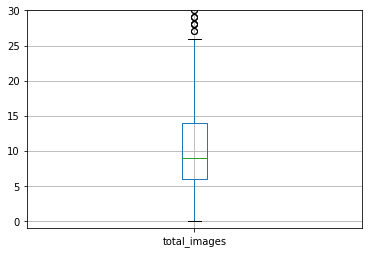

In [120]:
#обработка аномальных значений в total_images

print(data['total_images'].describe())
data.boxplot(['total_images'])
plt.xlim(0,2)
plt.ylim(-1, 30)
plt.show()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


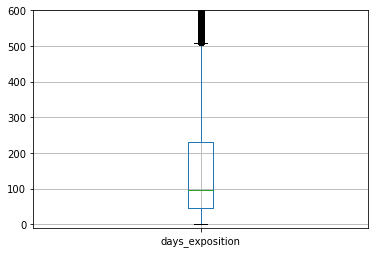

In [121]:
#обработка аномальных значений в days_exposition

print(data['days_exposition'].describe())
data.boxplot(['days_exposition'])
plt.xlim(0,2)
plt.ylim(-10, 600)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22614 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22614 non-null  int64         
 1   last_price            22614 non-null  float64       
 2   total_area            22614 non-null  float64       
 3   first_day_exposition  22614 non-null  datetime64[ns]
 4   rooms                 22614 non-null  int64         
 5   ceiling_height        13823 non-null  float64       
 6   floors_total          22614 non-null  int32         
 7   living_area           22614 non-null  float64       
 8   floor                 22614 non-null  int64         
 9   is_apartment          22614 non-null  bool          
 10  studio                22614 non-null  bool          
 11  open_plan             22614 non-null  bool          
 12  kitchen_area          22614 non-null  float64       
 13  balcony         

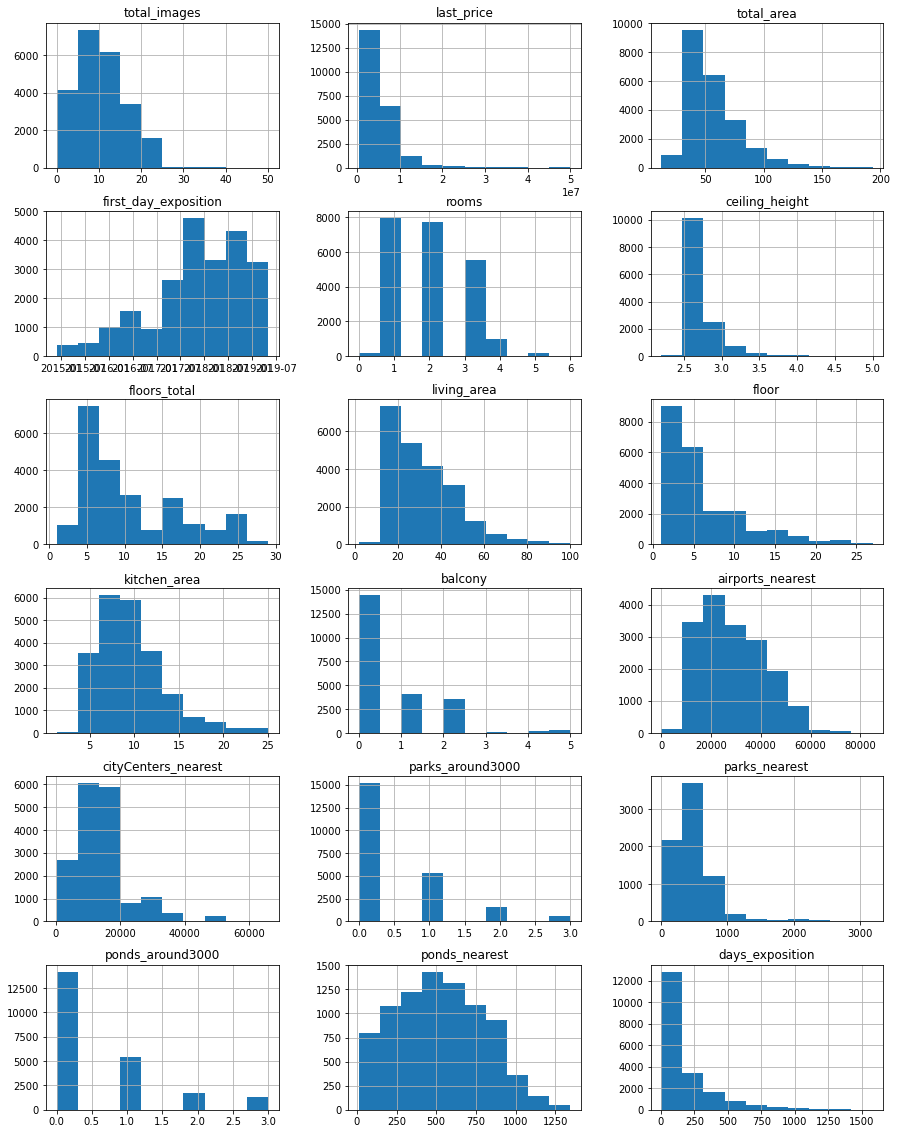

In [122]:
data_cleared = (
data
    .query('last_price <= 5*10**7')
    .query('total_area <= 200')
    .query('rooms <= 6')
    .query('(ceiling_height <= 5) and (ceiling_height >= 2.2) or (ceiling_height.isna())')
    .query('living_area <= 100')
    .query('kitchen_area <= 25')   
    .query('floors_total <= 30')
#    .query('total_images <= 30')
#    .query('days_exposition <= 1300')
)

data_cleared.hist(figsize = (15, 20), layout = (6, 3))
data_cleared.info()

In [123]:
print('Данных после обработки осталось: {:.2%}'.format(data_cleared.shape[0] / data_first.shape[0]))

Данных после обработки осталось: 95.42%


**Вывод:** из изначальных 23699 строк после переработки данных осталось 22614, то есть примерно 95% от изначального объема. Заполнены пропуски там, где это возможно. Устранены дубликаты в названиях населенных пунктов, а также значения, которые можно считать выбросами. Данные готовы к последующему анализу.

## 3 Добавление в таблицу новых столбцов

In [124]:
data_cleared['price_per_meter'] = (data_cleared['last_price']/data_cleared['total_area']).round(2)
data_cleared['publication_day'] = pd.DatetimeIndex(data_cleared['first_day_exposition']).weekday 
data_cleared['publication_month'] = pd.DatetimeIndex(data_cleared['first_day_exposition']).month
data_cleared['publication_year'] = pd.DatetimeIndex(data_cleared['first_day_exposition']).year
data_cleared['city_center_km'] = (data_cleared['cityCenters_nearest']/1000).round(0)

def categorize_floor(row): # категоризируем этажи на 3 типа
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

data_cleared['floor_type'] = data_cleared.apply(categorize_floor, axis = 1)
data_cleared.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_day,publication_month,publication_year,city_center_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,14.0,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,0.0,NaN,55.0,95065.79,0,9,2018,NaN,другой
6,6,3700000.0,37.3,2017-11-02,1,NaN,26,10.6,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,19.0,другой


**Выводы:**

В таблицу рассчитаны и добавлены следующие столбцы:
- `price_per_meter` — цена одного квадратного метра
- `publication_day` — день недели публикации объявления (0 — понедельник, 1 — вторник и т.д.)
- `publication_month` — месяц публикации объявления
- `publication_year` — год публикации объявления
- `floor_type` — тип этажа квартиры (значения — «первый», «последний», «другой»)
- `city_center_km` — расстояние до центра города в километрах

## 4 Исследовательский анализ данных

### 4.1 Изучение параметров объектов

Изучим следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

**Общая площадь**

Скошенное вправо распределение, средняя прощать - 55 кв. м., больше всего квартир в диапазоне от 30 до 50.

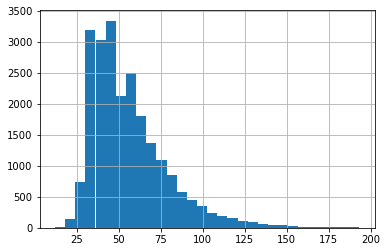

In [125]:
data_cleared['total_area'].hist(bins=30);
#data_cleared['total_area'].describe()

**Жилая площадь**

На гистограмме видно три пика: в районе 18 кв. м. для однокомнатных, в районе 30 кв. м. - для двухкомнатных, 45 кв. м. - трехкомнатных. Это наиоболее характерный суммарный размер жилых комнат для каждого типа квартир.

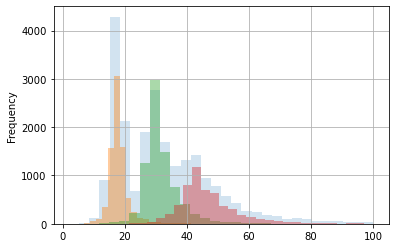

In [126]:
data_cleared['living_area'].plot(kind='hist', bins=30, alpha = 0.2)
#data_cleared['living_area'].describe()
# на гистограмме видно два пика с большим провалом между ними: 
# в области 18 кв. м. - однокомнатные квартиры? и  30 кв. м. - двухномнатные?
# средняя площадь составляет 32 кв. м. Проверим нашу гипотезу
#data_cleared.query('rooms == 0')['living_area'].plot(kind='hist', bins=30, alpha = 0.4)
data_cleared.query('rooms == 1')['living_area'].plot(kind='hist', bins=30, alpha = 0.4)
data_cleared.query('rooms == 2')['living_area'].plot(kind='hist', bins=30, alpha = 0.4)
data_cleared.query('rooms == 3')['living_area'].plot(kind='hist', bins=30, alpha = 0.4, grid = True);
# действительно, есть даже три пика: в районе 18 кв. м. для однокомнатных, 
# в районе 30 кв. м. - для двухкомнатных, 45 кв. м. - трехкомнатных

**Площадь кухни**

Средняя площадь кухни составляет всего 10 кв. м., наибольшее количество значений сосредоточено в диапазоне от 5 до 11 кв. м. Во всех объектах достаточно маленькие кухни?

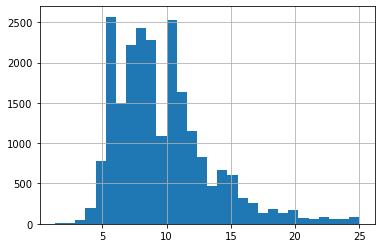

In [127]:
data_cleared['kitchen_area'].hist(bins=30);
#data_cleared['kitchen_area'].describe()

**Цена объекта**

Средняя цена объекта составляет 5.3 млн. рублей, однако большинство значений сосредоточено в диапазоне от 3 до 5 млн. Это может быть связано с тем, что большинство объектов имеют 2 комнаты и менее.

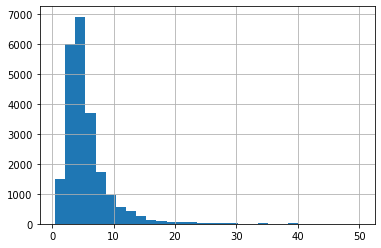

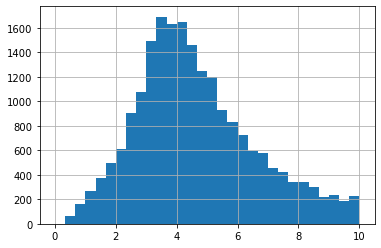

In [128]:
(data_cleared['last_price']/10**6).hist(bins=30);
plt.show()
(data_cleared['last_price']/10**6).hist(bins=30, range =(0, 10));
#data_cleared['last_price'].describe()
#data_cleared['last_price'].corr(data_cleared['rooms'])

**Количество комнат**

В среднем объекты имеют по две комнаты, но количество однокомнатных и двухкомнатных квартир примерно рано и достигает 4200. Очень мало объявление со студиями (количество комнат равно 0) и квартирами с 5 комнатами и более.

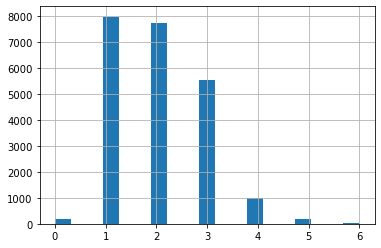

In [129]:
data_cleared['rooms'].hist(bins = data['rooms'].max());
#data_cleared['rooms'].describe()

# data_cleared.groupby('rooms')['rooms'].count()
# data_cleared.query('studio == True and (rooms == 0)').groupby('rooms')['studio'].count()

**Высота потолков**

Распределение высоты потолков очень неравномерное: пик приходится на высоту 2.5 м. - в целом стандартную, но также есть пики на отметках в 2.7 м. и 3 м.

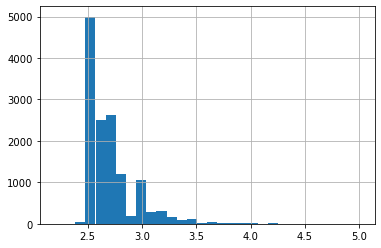

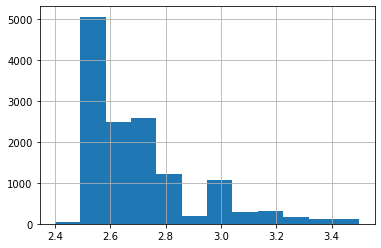

In [130]:
data_cleared['ceiling_height'].hist(bins=30);
plt.show()
data_cleared['ceiling_height'].hist(bins= 12, range = (2.4, 3.5));
#data_cleared['ceiling_height'].describe()

**Этажность: этаж квартиры, тип этажа квартиры  общее количество этажей в доме**

В среднем этажность домов составляет 5-6 этажей, что довольно мало, также много домов в 9 этажей. Пик количества квартир приходится на диапазон от 1 до 5 этажей. Возможно, в базе много объектов старого фонда? На графике имеются провалы в районе 7, 13 и 21 этажей: на них совсем нет квартир. Вероятно, дома такой этажности просто не стоят? Объектов на первых и последних этажах примерно одинаковое колличество.

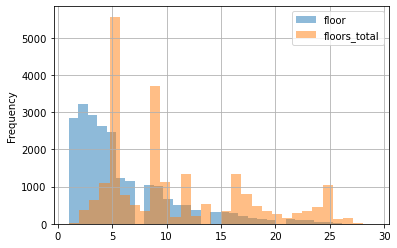

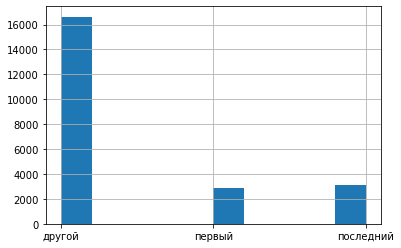

In [131]:
data_cleared['floor'].plot(kind='hist', bins=30, alpha = 0.5, legend = True)
data_cleared['floors_total'].plot(kind='hist', bins=30, alpha = 0.5, grid = True, legend = True)
#data_cleared['floor'].describe()
plt.show()
data_cleared['floor_type'].hist();
#data_cleared['floor_type'].describe()

**Расстояние до центра города в метрах, до ближайшего аэропорта и до ближайшего парка (в метрах)**

Парки в среднем расположены в пределах 500 метров от дома, а центр города - в пределах 15 км. Расстояние до аэропорта не имеет четко выраженных пиков и в среднем составляет 30 км.

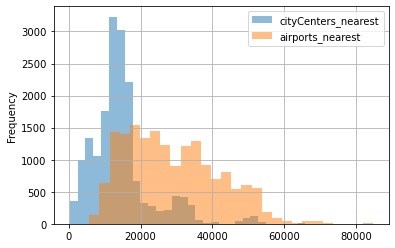

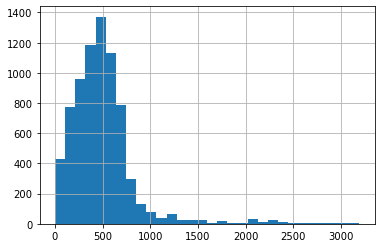

In [132]:
data_cleared['cityCenters_nearest'].plot(kind='hist', bins=30, alpha = 0.5, legend = True)
#print(data_cleared['cityCenters_nearest'].describe())
data_cleared['airports_nearest'].plot(kind='hist', bins=30, alpha = 0.5, grid = True, legend = True)
#print(data_cleared['airports_nearest'].describe())
plt.show()
data_cleared['parks_nearest'].hist(bins=30);
#data_cleared['parks_nearest'].describe()

**День и месяц публикации объявления**

Объявления чаще всего публикуются в будние дни недели, тогда как в субботу и воскресенье их количество в среднем в два раза меньше, чем, например, в понедельник. Меньше всего объявлений приходится на конец весны - начало лета, а больше всего - на декабрь и январь.

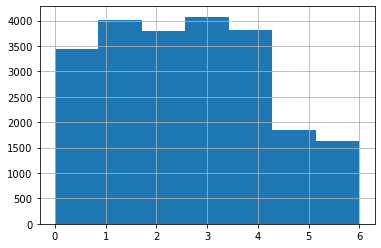

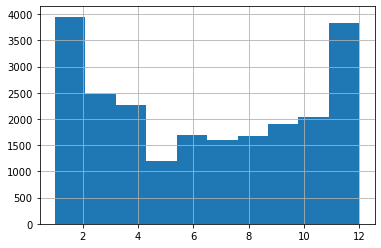

In [133]:
data_cleared['publication_day'].hist(bins = 7)
plt.show()
data_cleared['publication_month'].hist();

**Вывод:** Средняя площадь квартиры в датасете составляет 55 кв.м., хорошо прослеживается зависимость жилой площади от числа комнат. Средняя цена объекта составляет 5.3 млн. рублей, однако большинство значений сосредоточено в диапазоне от 3 до 5 млн. В среднем объекты имеют по две комнаты, но количество однокомнатных и двухкомнатных квартир примерно рано. В среднем этажность домов составляет 5-6 этажей, что довольно мало, также много домов в 9 этажей. Пик количества квартир приходится на диапазон от 1 до 5 этажей. Можно предположить, что в датасете преобладают объекты старого фонда, ведь большинство новостроек имеет большую этажность. Объявления о продаже чаще публикуют в будние дни зимой, то есть в конце и в начале года.   

### 4.2 Изучение скороски продажи квартир

Среднее время продажи квартир составляет 177 дней, а медиана времи продажи квартир составляет 93 дня. Показатели различаются практически в 2 раза, и это учитывая пиковое значение на первый день продажи при поиске среднего. Получается, сильное влияние на среднее оказывают объявления, которые висят на сайте дольше 230 дней - именно на этой отметке кончается третий квартиль, так что такие объявления можно считать долгими. Медиана в данном случае показывает более реальный срок продажи - примерно 3 месяца. Причем стоимость объекта не влияет на срок его продажи - средняя цена долгого объявления равна средней цене обычного.

Среднее время продажи квартир 177.13
Медиана времи продажи квартир 93.0


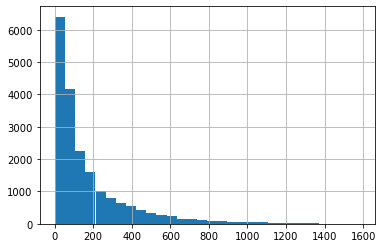

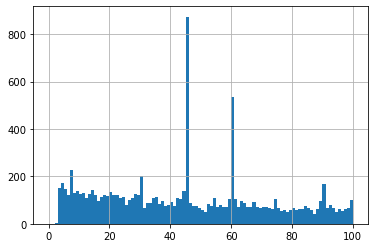

In [134]:
print('Среднее время продажи квартир', round(data_cleared['days_exposition'].mean(), 2))
print('Медиана времи продажи квартир', data_cleared['days_exposition'].median())
#data_cleared.boxplot(['days_exposition'])
data_cleared['days_exposition'].hist(bins = 30)
plt.show()
data_cleared['days_exposition'].hist(bins = 100, range = (0, 100));

# проверим влияние стоимости на срок размещения объявления

#data_cleared.query('days_exposition > 200')['last_price'].mean()
#data_cleared.query('days_exposition <= 200')['last_price'].mean()

**Выводы:** согласно медианному значению, объекты продаются примерно за 2 месяца. В данных есть пик в районе первого дня с момента размещения, он может быть связан с тем, что пользователи сами отзывают своё объявление без продажи объекта.

### 4.3 Какие факторы больше всего влияют на полную стоимость объекта?

Наибольшее влияние на полную стоимость объекта оказывает общая прощадть объекта, коэффициент корреляции между этими двумя величинами составляет 0.73. Коэффициент положителен, а значит цена растет вместе с увеличением площади. Следом за общей площадью идут площадь кухнли, жилая площадь и количество комнат: они все связаны с общей площадью. 

In [135]:
data_for_price = data_cleared.pivot_table(index = data_cleared.index, values = 
    ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms'])
#data_for_price.info()
display(data_for_price.corr())

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.550150,0.360538,0.213840,0.577564
last_price,0.550150,1.000000,0.640237,0.441885,0.735689
living_area,0.360538,0.640237,1.000000,0.870767,0.930885
rooms,0.213840,0.441885,0.870767,1.000000,0.791314
total_area,0.577564,0.735689,0.930885,0.791314,1.000000


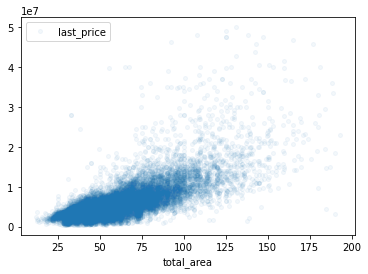

In [136]:
data_for_price.plot(y = 'last_price', x = 'total_area', style = 'o', alpha = 0.05, markersize = 4);

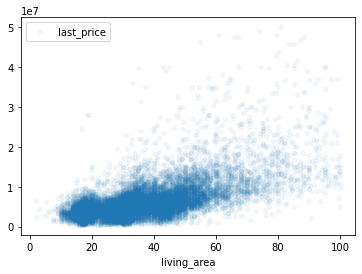

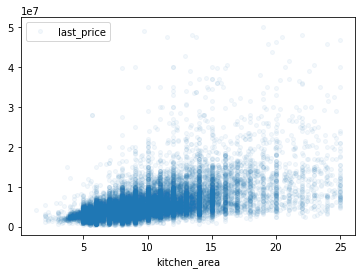

In [137]:
data_for_price.plot(y = 'last_price', x = 'living_area', style = 'o', alpha = 0.05, markersize = 4)
data_for_price.plot(y = 'last_price', x = 'kitchen_area', style = 'o', alpha = 0.05, markersize = 4);

**Влияние даты публицации объявления**

День публикации никак не влияет на полную стоимость объекта. Цены незначительно отличаются по месяцам: в мае и июне объекты продаются дешевле всего. За весь исследуемый временной промежуток самые высокие цены были в 2014 году, после чего начался спад вплоть до 2018 года. В 2019 году цены на квартиры вновь стали повышаться.

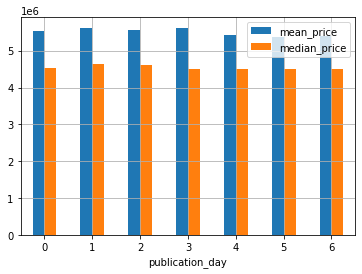

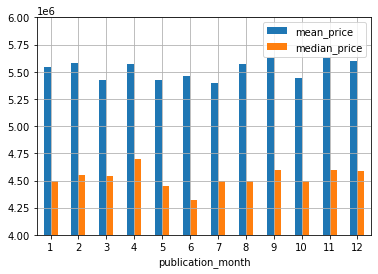

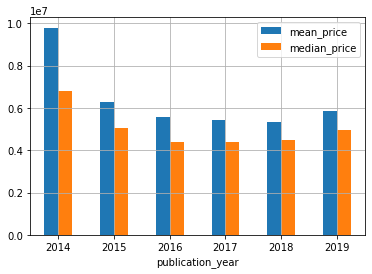

In [138]:
data_day = data_cleared.pivot_table(index = 'publication_day', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
data_day.columns = ['count', 'mean_price', 'median_price']
data_day.plot.bar(y = ['mean_price', 'median_price'], grid = True, rot = 0)
plt.show()

data_month = data_cleared.pivot_table(index = 'publication_month', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
data_month.columns = ['count', 'mean_price', 'median_price']
data_month.plot.bar(y = ['mean_price', 'median_price'], grid = True, rot = 0)
plt.ylim(4*10**6, 6*10**6);
plt.show()

data_year = data_cleared.pivot_table(index = 'publication_year', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
data_year.columns = ['count', 'mean_price', 'median_price']
data_year.plot.bar(y = ['mean_price', 'median_price'], grid = True, rot = 0);

**Влияение количества комнат**

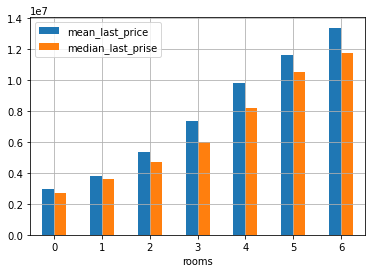

In [139]:
data_rooms = data_cleared.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
data_rooms.columns = ['total_ad', 'mean_last_price', 'median_last_prise']
data_rooms.plot.bar(y = ['mean_last_price', 'median_last_prise'], grid = True, rot = 0);

**Влияние типа этажа, на котором расположена квартира (первый, последний, другой)**

Средняя цена на квартиры на первом этаже значительно ниже, чем на более высоких: разница в цене составляет до 1 млн. рублей. Квартиры на последних этажах также в среднем дешевле, чем на других.

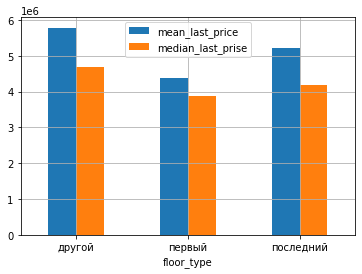

In [144]:
data_floor = data_cleared.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
data_floor.columns = ['total_ad', 'mean_last_price', 'median_last_prise']
data_floor
data_floor.plot.bar(y = ['mean_last_price', 'median_last_prise'], grid = True, rot = 0);

**Вывод:** больше всего на стоимость квартиры влияет её площадь. Между количеством комнат и полной стоимостью объекта видна практически линейная зависимость. Объекты на первом этаже стоят дешевле, чем на последнем, а на последнем - дешевле, чем на каком-то другом. Летом общая стоимость несколько ниже, чем в другие времена года.

### 4.4  Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Самые дорогие квартиры находятся в Санкт-Петербурге и Пушкине, там цена за один квадратный метр превышает 100 тыс. рублей. Самые дешевые квадратные метры во Всеволожске, где цена составляет примерно 70 тыс. рублей, и в Выборге, где цена ниже 60 тыс. млн. рублей.

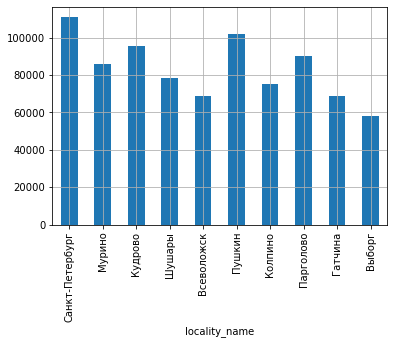

In [141]:
data_top = data_cleared.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = ['count', 'mean'])
data_top.columns = ['total_ad', 'mean_price_m2']
data_top = data_top.sort_values(by = 'total_ad', ascending = False).head(10)
data_top['mean_price_m2'].plot.bar(grid = True);

Однако, такой график не слишком нагляден. Вместо этого построим диаграмму рассеяния для каждого из топ-10 населенных пунктов.

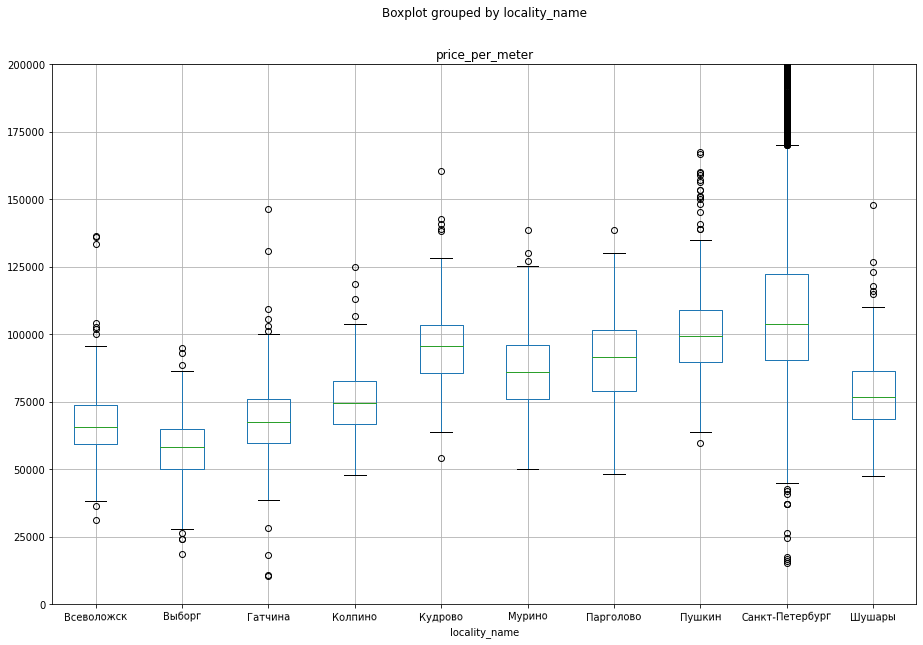

In [142]:
(data_cleared
    .query('locality_name in @data_top.index')
    .boxplot(by = 'locality_name', column = 'price_per_meter', rot = 1, figsize = (15,10))
)
plt.ylim(0, 2*10**5);

**Выводы:** по стоимости одного квадратного метра лидируют Санкт-Петербург и Пушкин, а самыми бюджетными вариантами являются Выборг и Всеволожск.

### 4.5 Зависимость стоимости объектов от расстояния до центра города в Санкт-Петербурге

Как видно по графику, по мере удаления от центра города цена средняя полная цена объекта уменьшается. Ту же зависимость демонстрирует и коэффициент корреляции: он отрицательный, а значит с увеличением одной величины другая будет уменьшаться. Судя по резкому спаду кривой в районе 7 км, можно сделать вывод, что примерно в этом месте заканчивается центр города.

Коэффициент корреляции между ценой и расстоянием до центра города составляет: -0.38970700037983247


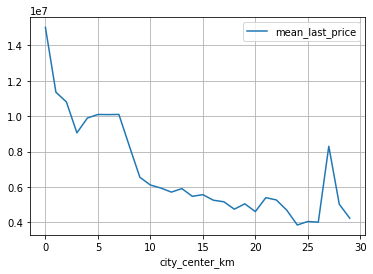

In [143]:
data_spb = data_cleared.query('locality_name == "Санкт-Петербург"')
print('Коэффициент корреляции между ценой и расстоянием до центра города составляет:', 
      data_spb['last_price'].corr(data_spb['city_center_km']))
data_spb = data_spb.pivot_table(index = 'city_center_km', values = 'last_price', aggfunc = ['count', 'mean'])
data_spb.columns = ['count', 'mean_last_price']
data_spb.head()
data_spb = data_spb.reset_index()
data_spb.plot(x = 'city_center_km', y = 'mean_last_price', grid = True);

## Общий вывод

1. Произведены обработка и анализ датасета объектов недвижимости, который содержит 23699 строк, 22 столбца. В нем представлены все необходимые для анализа параметры, включая данные о самом объекте, его местоположении относительно других стуктур, а также данные об объявлении. Часть данных заполняется пользователем, а часть - автоматически.


2. На этапе переработки данных было выявлено большое количество пропусков. Там, где это возможно, они были заполнены. По итогу данного этапа получен заполненный и очищенный от выбросов и дубликатов датасет, со скорректированными типами данных и добавленными для последующего анализа новыми столбцами.


3. По итогам исследовательского анализа можно сделать следующие выводы:

    - в датасете представлены квартиры в среднем с площадью в 55 кв.м., хорошо прослеживается зависимость жилой площади от числа комнат; 
    - средняя цена объекта составляет 5.3 млн. рублей, однако большинство значений сосредоточено в диапазоне от 3 до 5 млн;
    - в среднем объекты имеют по две комнаты, но количество однокомнатных и двухкомнатных квартир примерно равно;
    - в среднем этажность домов составляет 5-6 этажей, что довольно мало, также много домов в 9 этажей. Пик количества квартир приходится на диапазон от 1 до 5 этажей. Можно предположить, что в датасете преобладают объекты старого фонда; 
    - сами объявления о продаже чаще публикуют в будние дни зимой, то есть в конце и в начале года;
    - больше всего на стоимость квартиры влияет её площадь. Между количеством комнат и полной стоимостью объекта видна практически линейная зависимость. Объекты на первом и последнем этажах стоят дешевле, чем на каком-то другом;
    -  по стоимости одного квадратного метра лидируют Санкт-Петербург и Пушкин, а самыми бюджетными вариантами являются Выборг и Всеволожск;
    - по мере удаления от центра города цена средняя полная цена объекта уменьшается.